In [1]:
import os
import gc
import re
import string
import operator

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import nltk
from nltk.util import ngrams
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split

from collections import defaultdict
from collections import Counter


import warnings
warnings.filterwarnings(action='ignore')

In [2]:
data = pd.read_csv('tweets data.csv')

In [3]:
data.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [4]:
data.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [5]:
data.shape

(27481, 4)

In [6]:
data.shape

(27481, 4)

In [7]:
data.isnull().sum().sort_values(ascending=False)

text             1
selected_text    1
textID           0
sentiment        0
dtype: int64

In [8]:
data.isnull().sum().sort_values(ascending=False)

text             1
selected_text    1
textID           0
sentiment        0
dtype: int64

In [9]:
data = data.dropna()

In [10]:
data.isnull().sum()

textID           0
text             0
selected_text    0
sentiment        0
dtype: int64

# EDA 


<AxesSubplot:title={'center':'Sentiments Value counts'}, xlabel='Sentiment', ylabel='Tweets'>

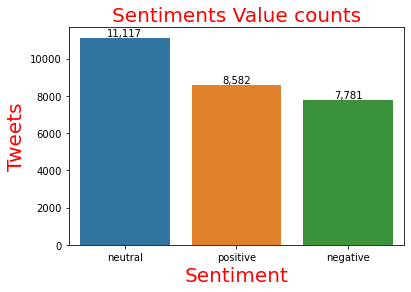

In [11]:
x=data.sentiment.value_counts()
ax = sns.barplot(x.index,x)
for i, v in enumerate(x.iteritems()):        
    ax.text(i ,v[1], "{:,}".format(v[1]), ha='center', va ='bottom', fontsize=10, color='black', rotation=0)
plt.title("Sentiments Value counts",color='red',size='20')
plt.xlabel("Sentiment",color='red',size='20')
plt.ylabel("Tweets",color='red',size='20')
plt.gca()

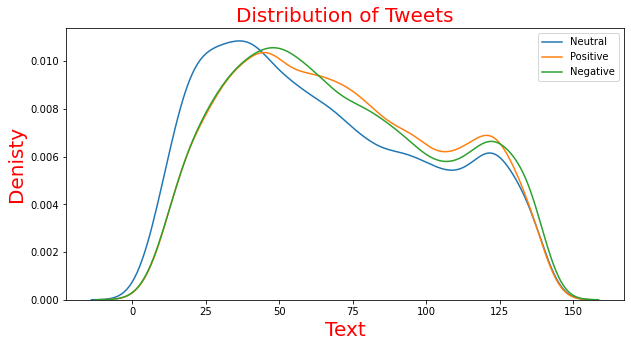

In [12]:
fig, ax = plt.subplots(figsize=(10,5))
sns.kdeplot(data[data['sentiment']=='neutral']['text'].str.len())
sns.kdeplot(data[data['sentiment']=='positive']['text'].str.len())
sns.kdeplot(data[data['sentiment']=='negative']['text'].str.len())
plt.title("Distribution of Tweets",color='red',size='20')
plt.xlabel("Text",color='red',size='20')
plt.ylabel("Denisty",color='red',size='20')
ax.legend(labels=["Neutral","Positive","Negative"])

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27480 entries, 0 to 27480
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   textID         27480 non-null  object
 1   text           27480 non-null  object
 2   selected_text  27480 non-null  object
 3   sentiment      27480 non-null  object
dtypes: object(4)
memory usage: 1.0+ MB


In [14]:
df = data.drop(['textID'], axis=1)

In [15]:
nltk.download('punkt')
nltk.download('stopwords')
stemmer  = SnowballStemmer('english')
stopword = stopwords.words('english')

def Remove_StopAndStem(text):
    string_list = text.split()
    return ' '.join([stemmer.stem(i) for i in string_list if i not in stopword])

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\IBRAHIM\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\IBRAHIM\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
df['text'] = df['text'].apply(Remove_StopAndStem)

In [17]:
df.head()

,text,selected_text,sentiment
0,"i`d responded, i go","I`d have responded, if I were going",neutral
1,sooo sad i miss san diego!!!,Sooo SAD,negative
2,boss bulli me...,bullying me,negative
3,interview! leav alon,leave me alone,negative
4,"son ****, couldn`t put releas alreadi bought","Sons of ****,",negative


In [18]:

from wordcloud import WordCloud

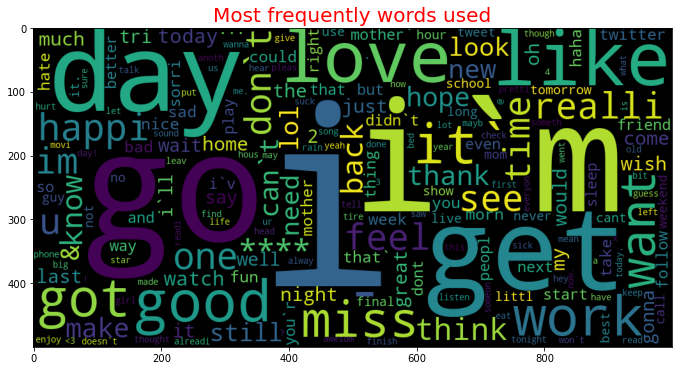

In [19]:
dict_of_words = {}
for row in  df.itertuples():
    for i in row[1].split():
        try:
            dict_of_words[i] += 1
        except:
            dict_of_words[i] = 1

#Initializing  WordCloud
wordcloud = WordCloud(background_color = 'black', width=1000, height=500).generate_from_frequencies(dict_of_words)
fig = plt.figure(figsize=(10,5))
plt.imshow(wordcloud)
plt.tight_layout(pad=1)
plt.title("Most frequently words used",color='red',size='20')
plt.show()

In [20]:
df

,text,selected_text,sentiment
0,"i`d responded, i go","I`d have responded, if I were going",neutral
1,sooo sad i miss san diego!!!,Sooo SAD,negative
2,boss bulli me...,bullying me,negative
3,interview! leav alon,leave me alone,negative
4,"son ****, couldn`t put releas alreadi bought","Sons of ****,",negative
...,...,...,...
27476,wish could come see u denver husband lost job ...,d lost,negative
27477,i`v wonder rake to. the client made clear .net...,", don`t force",negative
27478,yay good you. enjoy break - probabl need hecti...,Yay good for both of you.,positive
27479,but worth ****.,But it was worth it ****.,positive


# Preprocessing 

In [21]:

#A method to pre-process the text by lowecasing and remove any URLs, twitter pic URL, emails, Mentions, hashtags, numbers, apostrophe, punctuation‏s, 
def clean(text): 
  #Remove numbers because it dose not have meaning for the sentiment
  #text = re.sub("\d", "", text) 
  #remove apostrophe  
  text = re.sub("'\w+", "", text) 
  #Remove punctuation‏  
  text = re.sub("[^\s\w]", "", text) 
  #Remove whitespace at the begining and end of a text
  text = text.strip()
  #Remove extra whitespace
  text = re.sub(" +",' ',text)
  #convert the text to lowercase form
  text= text.lower()
  #return new form of text
  return(text)
  
    
#A method to remove remove stopwords from text
def remove_stopwords(text):
    stopwords_list = stopwords.words('english')
    #Some words might indicate a certain sentiment so they are kept via a whitelist
    whitelist = ["n't", "not", "no"," "]
    words = text.split() 
    clean_words = [word for word in words if (word not in stopwords_list or word in whitelist) and len(word) > 1] 
    #return text after removing the stopwords
    return " ".join(clean_words)


wordnet_lemmatizer = WordNetLemmatizer()
def lemmatization(text):
    tokens=text.split()
    r=""
    for w in tokens:
        r+=wordnet_lemmatizer.lemmatize(w ,pos="v")+" "
    return r

In [22]:
df['text'] = df['text'].apply(remove_stopwords).apply(clean).apply(lemmatization)

In [23]:
df

,text,selected_text,sentiment
0,id respond go,"I`d have responded, if I were going",neutral
1,sooo sad miss san diego,Sooo SAD,negative
2,boss bulli me,bullying me,negative
3,interview leav alon,leave me alone,negative
4,son couldnt put releas alreadi buy,"Sons of ****,",negative
...,...,...,...
27476,wish could come see denver husband lose job ca...,d lost,negative
27477,iv wonder rake to client make clear net only d...,", don`t force",negative
27478,yay good you enjoy break probabl need hectic w...,Yay good for both of you.,positive
27479,worth,But it was worth it ****.,positive


In [24]:
import re, nltk
nltk.download('punkt')
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.decomposition import NMF
from sklearn.metrics.pairwise import cosine_similarity
import string
from nltk.corpus import stopwords
nltk.download('stopwords')
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.metrics import f1_score
from sklearn.svm import SVC

from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\IBRAHIM\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\IBRAHIM\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# NMF

In [25]:
vectorizer = TfidfVectorizer(use_idf=True, lowercase=True)
X_tf_idf= vectorizer.fit_transform(df['text'])
pd.DataFrame(X_tf_idf.toarray(), columns=vectorizer.get_feature_names()).head(10)

,00,000,0003,01,024,03,04,0405,0430,05,...,ï½stupidityï½,ï½tearï½,ï½timo,ï½ureo,ï½why,ï½whyyy,ï½you,ï½ï½,ï½ï½h,ï½ï½ï½ï½
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
nmf_model = NMF(2)
doc_topic = nmf_model.fit_transform(X_tf_idf)

In [27]:
topic_word = pd.DataFrame(nmf_model.components_.round(3),
             index = ["component_1","component_2"],
             columns = vectorizer.get_feature_names())
topic_word

,00,000,0003,01,024,03,04,0405,0430,05,...,ï½stupidityï½,ï½tearï½,ï½timo,ï½ureo,ï½why,ï½whyyy,ï½you,ï½ï½,ï½ï½h,ï½ï½ï½ï½
component_1,0.0,0.0,0.001,0.001,0.001,0.0,0.0,0.0,0.0,0.001,...,0.0,0.0,0.0,0.0,0.0,0.0,0.001,0.0,0.001,0.001
component_2,0.0,0.0,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.000,0.000


In [28]:
def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [29]:
display_topics(nmf_model, vectorizer.get_feature_names(), 10)


Topic  0
go, im, get, work, it, good, dont, like, today, know

Topic  1
day, mother, happi, mom, love, there, mum, mommi, war, wish


In [30]:
Vt = pd.DataFrame(doc_topic.round(5),
             index = df['text'],
             columns = ["component_1","component_2" ])
Vt

,component_1,component_2
text,,
id respond go,0.02727,0.00000
sooo sad miss san diego,0.01239,0.00000
boss bulli me,0.00549,0.00000
interview leav alon,0.00435,0.00000
son couldnt put releas alreadi buy,0.00631,0.00000
...,...,...
wish could come see denver husband lose job cant afford,0.02391,0.00039
iv wonder rake to client make clear net only dont forc dev learn new lang agil ccnet,0.01212,0.00047
yay good you enjoy break probabl need hectic weekend take care hun xxxx,0.02418,0.00223


# Modeling 

In [31]:
vectorizer = TfidfVectorizer(use_idf=True, lowercase=True)
X_tf_idf= vectorizer.fit_transform(df['text'])
x_train, x_test, y_train, y_test = train_test_split(X_tf_idf, df['sentiment'], test_size=0.30, random_state=42)


In [32]:

def check_scores(clf,X_train, X_test, y_train, y_test):

    model=clf.fit(X_train, y_train)
    predicted_class=model.predict(X_test)
    predicted_class_train=model.predict(X_train)
    test_probs = model.predict_proba(X_test)
    test_probs = test_probs[:, 1]
    yhat = model.predict(X_test)


    print('Train confusion matrix is: ',)
    print(confusion_matrix(y_train, predicted_class_train))

    print()
    print('Test confusion matrix is: ')
    print(confusion_matrix(y_test, predicted_class))
    print()
    print(classification_report(y_test,predicted_class)) 
    print() 
    train_accuracy = accuracy_score(y_train,predicted_class_train)
    test_accuracy = accuracy_score(y_test,predicted_class)

    print("Train accuracy score: ", train_accuracy)
    print("Test accuracy score: ",test_accuracy )
    
    return train_accuracy, test_accuracy

In [33]:
params_grid = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

In [34]:
SVM = svm.SVC( probability=True)
s_train_accuracy, s_test_accuracy = check_scores(SVM,x_train, x_test, y_train, y_test)

Train confusion matrix is: 
[[5083  284   58]
 [  98 7509  167]
 [  83  274 5680]]

Test confusion matrix is: 
[[1187 1051  118]
 [ 310 2723  310]
 [  62  825 1658]]

              precision    recall  f1-score   support

    negative       0.76      0.50      0.61      2356
     neutral       0.59      0.81      0.69      3343
    positive       0.79      0.65      0.72      2545

    accuracy                           0.68      8244
   macro avg       0.72      0.66      0.67      8244
weighted avg       0.70      0.68      0.67      8244


Train accuracy score:  0.9498856311083386
Test accuracy score:  0.6754002911208151
